In [1]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real, realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from plind_tests.gaussian import Gaussian

%load_ext autoreload

%autoreload 2

In [2]:
testfunction = Gaussian(2)


In [40]:
# init model
delta = 0.4
Nstep = 150
dt_init = 8e-3
thresh =-60
tmax = dt_init*400

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))


plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)


In [41]:
plind.descend(delta, thresh, tmax, dt_init)

/Users/DylanJow/wave_lensing_scint/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


total steps: 42 current time: 3.2132014130499202


In [42]:
plind.integrate()
print(plind.integral)
print(testfunction.integral(*testfunction.expargs))
print(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral[0]))

((-7.068900755816555e-16+3.1415926535897905j), 4.518361512777314e-15)
3.141592653589793j
1.0000000000000009


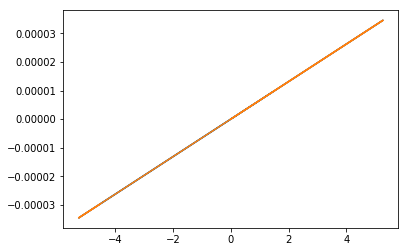

In [43]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

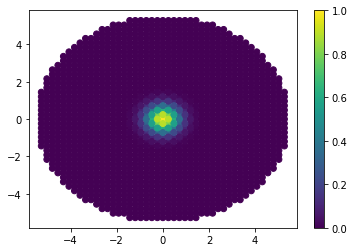

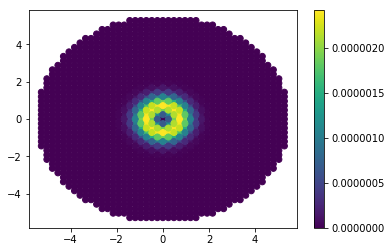

In [44]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])


intvals = np.array([intfun(p, 2) for p in plind.contour.points])
#triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
#plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, ys, c=intvals.imag)
plt.colorbar()
plt.show()

